In [13]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

In [14]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [15]:
# copy ab demo into current directory
ac.copydemo('ab')

# start AUTO with runner object
runner = ra.runAUTO()

print("\n***Generate starting data***")
start = ac.run(e='ab', c='ab.1', runner=runner)

print("\n***Compute stationary solution families***")
ab = []
for solution in start():
    ab = ab + ac.run(solution, c='ab.2', runner=runner)

print("\n***Relabel and save the output files***")
ab = ab.relabel()
ac.save(ab,'ab')

print("\n***Compute periodic solution families***")
for solution in ab("HB"):
    ab = ab + ac.run(solution, c='ab.3', runner=runner)

print("\n***Relabel and save the output files***")
ab = ab.relabel()
ac.save(ab,'ab')

Copying demo ab ... done

***Generate starting data***
gfortran -fopenmp -O -c ab.f90 -o ab.o
gfortran -fopenmp -O ab.o -o ab.exe /auto/lib/*.o
Starting ab ...

  BR    PT  TY  LAB    PAR(2)        L2-NORM         U(1)          U(2)     
   1     1  EP    1   8.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1    31  UZ    2   1.40000E+01   0.00000E+00   0.00000E+00   0.00000E+00
   1    36  UZ    3   1.50000E+01   0.00000E+00   0.00000E+00   0.00000E+00
   1    41  UZ    4   1.60000E+01   0.00000E+00   0.00000E+00   0.00000E+00
   1    46  UZ    5   1.70000E+01   0.00000E+00   0.00000E+00   0.00000E+00
   1    51  UZ    6   1.80000E+01   0.00000E+00   0.00000E+00   0.00000E+00

 Total Time    0.279E-01
ab ... done

***Compute stationary solution families***
Starting ab ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM         U(1)          U(2)     
   1    14  UZ    7   2.50000E-01   7.22011E-01   3.22893E-01   6.45786E-01

 Total Time    0.161E-01
ab ... done
Starting ab ...


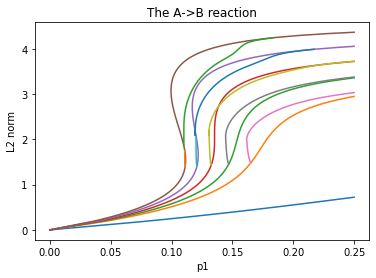

In [17]:
# plot bifurcation diagram using matplotlib

# extract relevant data for each branch
branches = [ {
    'p1'     : br['PAR(1)'],
    'L2norm' : br['L2-NORM']
} for br in ab ]

# draw plot
plt.figure()
for br in branches:
    plt.plot( br['p1'], br['L2norm'] )
plt.xlabel('p1')
plt.ylabel('L2 norm')
plt.title('The A->B reaction');

In [18]:
# clean up files

ac.clean()
ac.delete('ab')

Deleting fort.* *.o *.exe *.*~ ... done
Deleting b.ab ... done
Deleting s.ab ... done
Deleting d.ab ... done
